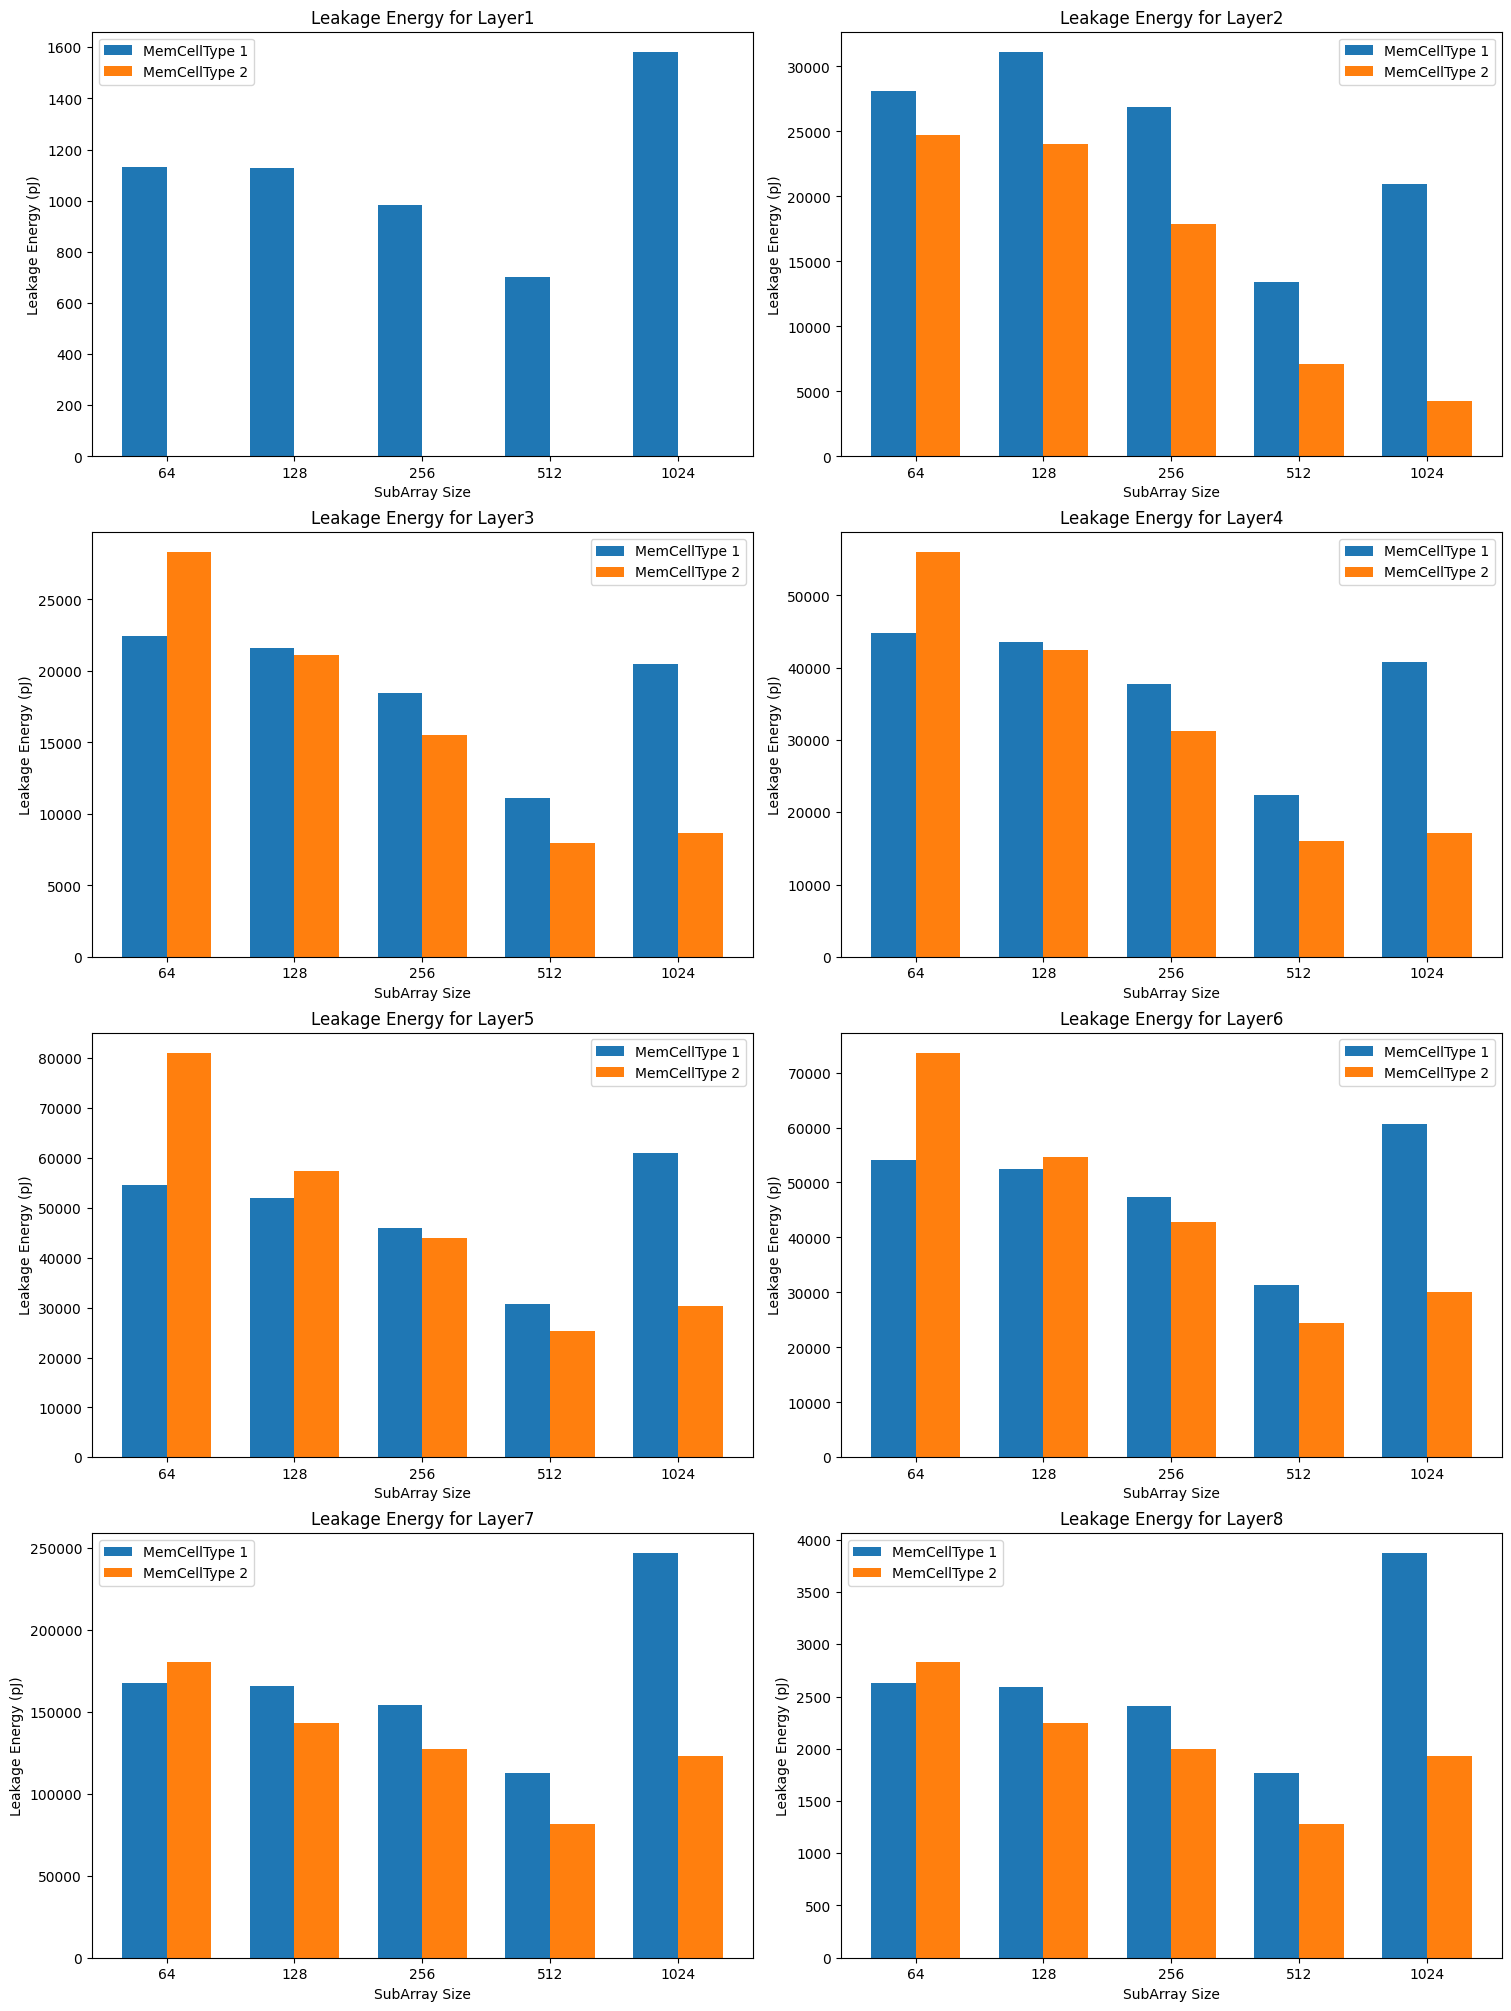

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
data = {
    'MemCellType': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'numRowSubArray/numColSubArray': [64, 128, 256, 512, 1024, 64, 128, 256, 512, 1024],
    'Layer1': [1131.5, 1129.51, 983.628, 700.266, 1582.08, 0, 0, 0, 0, 0],
    'Layer2': [28106.5, 31115.4, 26869, 13419, 20935.1, 24741.6, 24041.4, 17868.1, 7094.79, 4248.48],
    'Layer3': [22434.4, 21580.2, 18469, 11081.5, 20479.1, 28288.7, 21084.1, 15530.2, 7967.37, 8651.69],
    'Layer4': [44745.6, 43545.9, 37715.5, 22463.3, 40777.3, 55968.3, 42387.2, 31278.9, 16095.2, 17189.4],
    'Layer5': [54639.9, 51962.8, 45870.2, 30661.7, 60958.3, 81089.7, 57396.6, 44042, 25260.3, 30261],
    'Layer6': [54013.4, 52490.7, 47321.6, 31266.7, 60708.9, 73610.4, 54667.8, 42737, 24522.4, 30108],
    'Layer7': [167730, 165702, 154062, 112825, 247000, 180596, 143423, 127569, 81627.2, 122979],
    'Layer8': [2627.32, 2595.39, 2413.24, 1767.84, 3871.98, 2830.14, 2247.95, 1999.53, 1279.89, 1929.49],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(4, 2, figsize=(15, 20), constrained_layout=True)

# Flatten the axis array for easy iteration
ax = axes.flatten()

# Define the width of the bars
bar_width = 0.35

# Unique identifiers for the x-axis
indices = np.arange(len(df['numRowSubArray/numColSubArray'].unique()))

# Loop through each layer to plot
for i, layer in enumerate(['Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8']):
    # Filter data for MemCellType 1 and 2
    df_type1 = df[df['MemCellType'] == 1][['numRowSubArray/numColSubArray', layer]]
    df_type2 = df[df['MemCellType'] == 2][['numRowSubArray/numColSubArray', layer]]

    # Bar plots for each MemCellType
    ax[i].bar(indices - bar_width/2, df_type1[layer], bar_width, label='MemCellType 1')
    ax[i].bar(indices + bar_width/2, df_type2[layer], bar_width, label='MemCellType 2')

    # Setting the x-axis labels to show the subarray sizes
    ax[i].set_xticks(indices)
    ax[i].set_xticklabels(df['numRowSubArray/numColSubArray'].unique())


    # Adding titles and labels
    ax[i].set_title(f'Leakage Energy for {layer}')
    ax[i].set_xlabel('SubArray Size')
    ax[i].set_ylabel('Leakage Energy (pJ)')
    ax[i].legend()

plt.show()

# How Leakage Energy varies with varying layers?

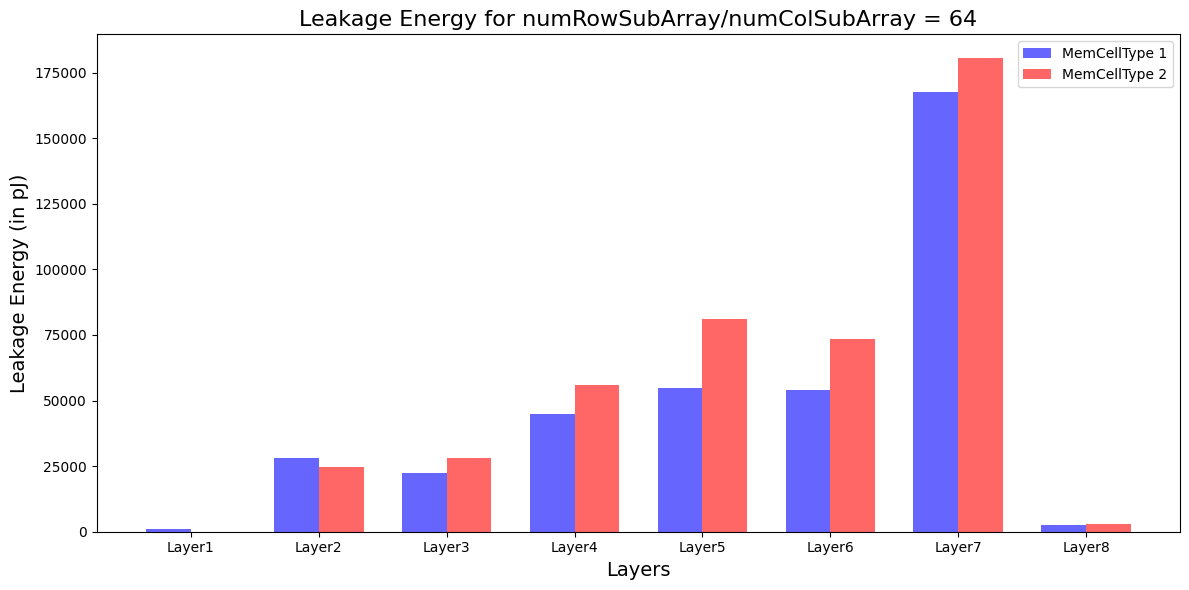

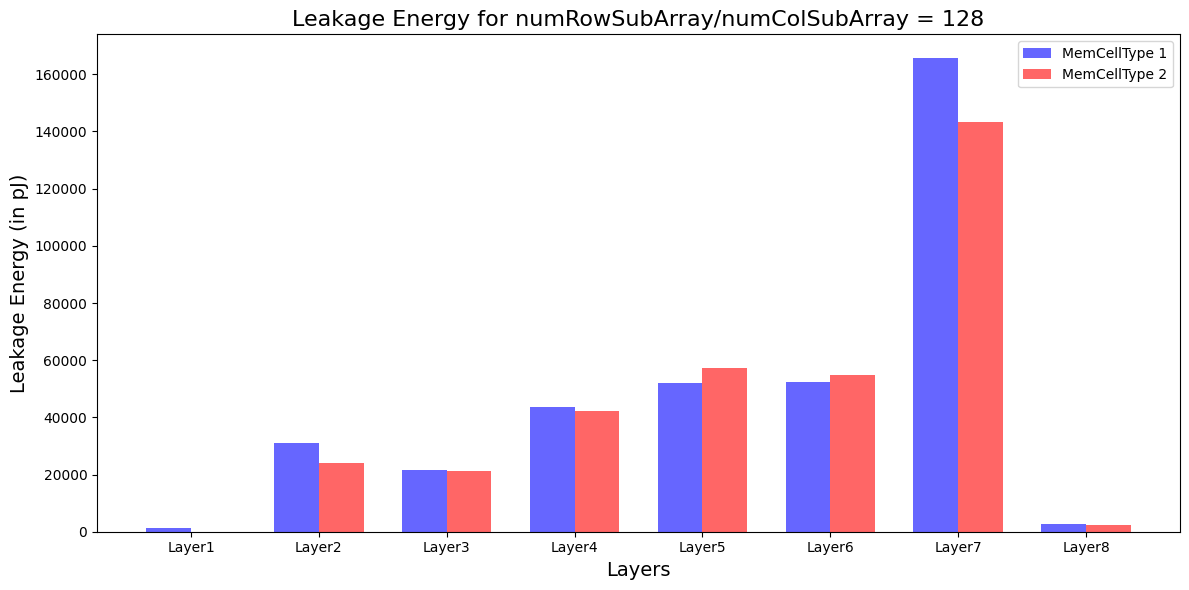

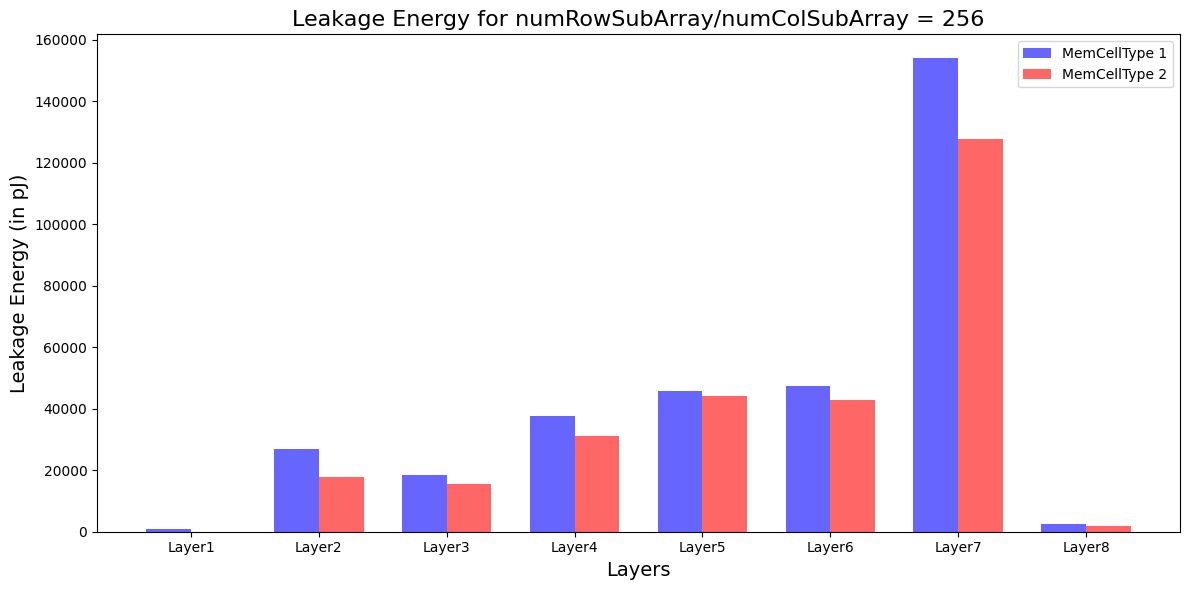

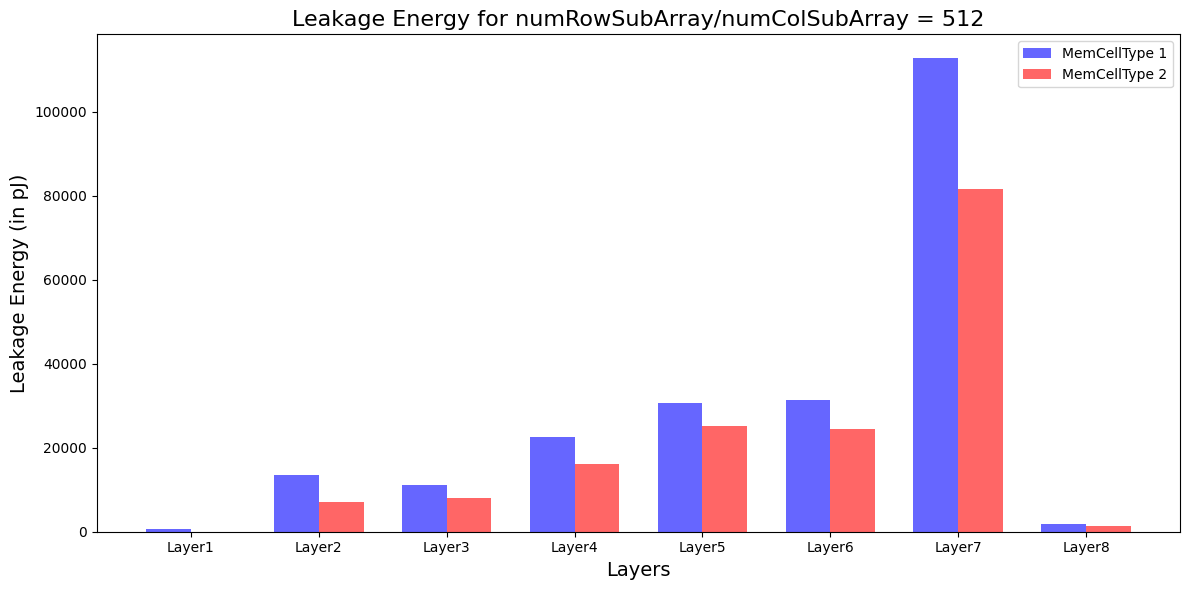

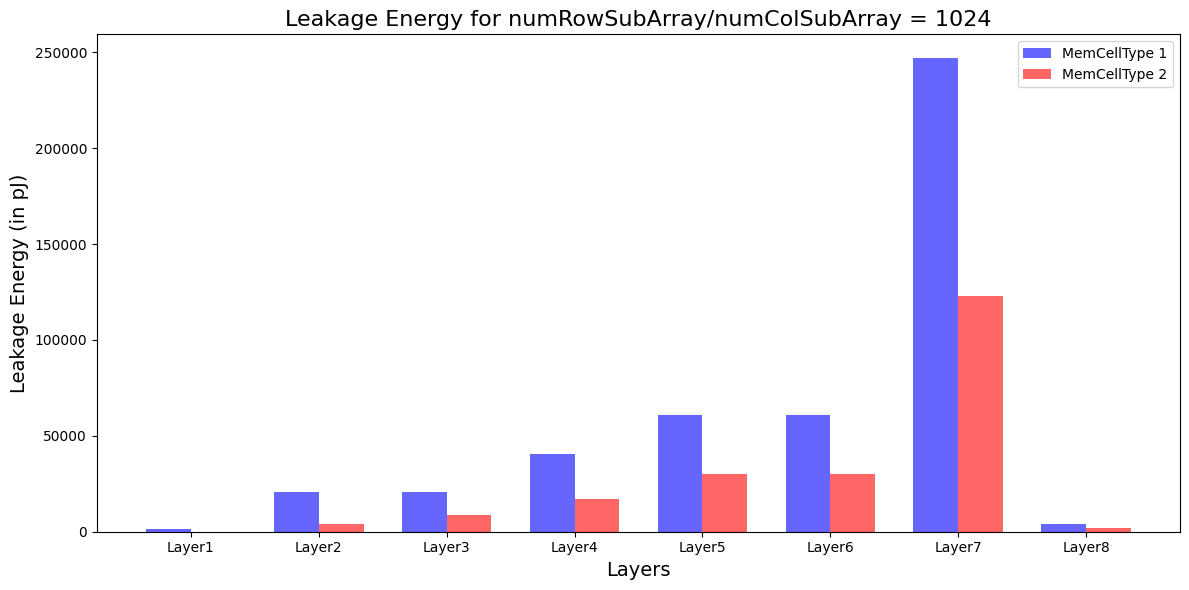

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Given data for Leakage Energy
data = {
    'SubArraySize': [64, 128, 256, 512, 1024],
    'MemCellType1': [
        [1131.5, 28106.5, 22434.4, 44745.6, 54639.9, 54013.4, 167730, 2627.32],
        [1129.51, 31115.4, 21580.2, 43545.9, 51962.8, 52490.7, 165702, 2595.39],
        [983.628, 26869, 18469, 37715.5, 45870.2, 47321.6, 154062, 2413.24],
        [700.266, 13419, 11081.5, 22463.3, 30661.7, 31266.7, 112825, 1767.84],
        [1582.08, 20935.1, 20479.1, 40777.3, 60958.3, 60708.9, 247000, 3871.98]
    ],
    'MemCellType2': [
        [0, 24741.6, 28288.7, 55968.3, 81089.7, 73610.4, 180596, 2830.14],
        [0, 24041.4, 21084.1, 42387.2, 57396.6, 54667.8, 143423, 2247.95],
        [0, 17868.1, 15530.2, 31278.9, 44042, 42737, 127569, 1999.53],
        [0, 7094.79, 7967.37, 16095.2, 25260.3, 24522.4, 81627.2, 1279.89],
        [0, 4248.48, 8651.69, 17189.4, 30261, 30108, 122979, 1929.49]
    ]
}

# Layers
layers = ['Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8']
bar_width = 0.35  # Width of the bars

# Loop through each sub-array size and create a plot
for size, mct1, mct2 in zip(data['SubArraySize'], data['MemCellType1'], data['MemCellType2']):
    index = np.arange(len(layers))

    plt.figure(figsize=(12, 6))
    plt.bar(index, mct1, bar_width, label='MemCellType 1', color='b', alpha=0.6)
    plt.bar(index + bar_width, mct2, bar_width, label='MemCellType 2', color='r', alpha=0.6)

    plt.xlabel('Layers', fontsize=14)
    plt.ylabel('Leakage Energy (in pJ)', fontsize=14)
    plt.title(f'Leakage Energy for numRowSubArray/numColSubArray = {size}', fontsize=16)
    plt.xticks(index + bar_width / 2, layers)
    plt.legend()
    plt.tight_layout()
    plt.show()
